<a href="https://colab.research.google.com/github/shoaib-1122-tech/Landings-Data-Meteorite-Cleaning-Visualization/blob/main/Landings_DataMeteorite_Cleaning_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploded = files.upload()

Saving meteorite_project_dirty.xlsx to meteorite_project_dirty.xlsx


READ FILE

In [ ]:
import pandas as pd
df = pd.read_excel('meteorite_project_dirty.xlsx')
df

,name,year,mass (g),recclass,reclat,reclong,fall
0,Aachen,1880-01-01,21,L5,50.775,6.08333,Fell
1,Aarhus,1951-01-01,NaN,H6,56.18333,10.23333,Fell
2,Abee,not available,107000,EH4,54.21667,-113,Fell
3,Acapulco,NaN,1914,Acapulcoite,NaN,-99.9,Fell
4,Achiras,1902-01-01,NaN,L6,-33.16667,-64.95,Fell
5,Bogus,1999-13-01,350,NaN,NaN,NaN,Found
6,FakeOne,random,NaN,H4,20,NaN,Fell
7,Unknown,2005-01-01,unknown,H5,no data,text,NaN


 Explore the Data

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df.head()

,name,year,mass (g),recclass,reclat,reclong,fall
0,Aachen,1880-01-01,21,L5,50.775,6.08333,Fell
1,Aarhus,1951-01-01,NaN,H6,56.18333,10.23333,Fell
2,Abee,not available,107000,EH4,54.21667,-113,Fell
3,Acapulco,NaN,1914,Acapulcoite,NaN,-99.9,Fell
4,Achiras,1902-01-01,NaN,L6,-33.16667,-64.95,Fell


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      8 non-null      object
 1   year      7 non-null      object
 2   mass (g)  5 non-null      object
 3   recclass  7 non-null      object
 4   reclat    6 non-null      object
 5   reclong   6 non-null      object
 6   fall      7 non-null      object
dtypes: object(7)
memory usage: 580.0+ bytes


In [ ]:

df.describe()


,name,year,mass (g),recclass,reclat,reclong,fall
count,8,7,5,7,6.000,6.00000,7
unique,8,7,5,7,6.000,6.00000,2
top,Aachen,1880-01-01,21,L5,50.775,6.08333,Fell
freq,1,1,1,1,1.000,1.00000,6


**Data cleaning**

In [ ]:
print(df.isnull().sum())

name        0
year        1
mass (g)    3
recclass    1
reclat      2
reclong     2
fall        1
dtype: int64


Year coulmn convert datatime

In [ ]:
df['year'] = pd.to_datetime(df['year'], errors= 'coerce')
df


,name,year,mass (g),recclass,reclat,reclong,fall
0,Aachen,1880-01-01,21,L5,50.775,6.08333,Fell
1,Aarhus,1951-01-01,NaN,H6,56.18333,10.23333,Fell
2,Abee,NaT,107000,EH4,54.21667,-113,Fell
3,Acapulco,NaT,1914,Acapulcoite,NaN,-99.9,Fell
4,Achiras,1902-01-01,NaN,L6,-33.16667,-64.95,Fell
5,Bogus,NaT,350,NaN,NaN,NaN,Found
6,FakeOne,NaT,NaN,H4,20,NaN,Fell
7,Unknown,2005-01-01,unknown,H5,no data,text,NaN


Convert mass to numeric and handle errors

In [ ]:
df['mass (g)'] = pd.to_numeric(df['mass (g)'], errors='coerce')
df

,name,year,mass (g),recclass,reclat,reclong,fall
0,Aachen,1880-01-01,21.0,L5,50.775,6.08333,Fell
1,Aarhus,1951-01-01,NaN,H6,56.18333,10.23333,Fell
2,Abee,NaT,107000.0,EH4,54.21667,-113,Fell
3,Acapulco,NaT,1914.0,Acapulcoite,NaN,-99.9,Fell
4,Achiras,1902-01-01,NaN,L6,-33.16667,-64.95,Fell
5,Bogus,NaT,350.0,NaN,NaN,NaN,Found
6,FakeOne,NaT,NaN,H4,20,NaN,Fell
7,Unknown,2005-01-01,NaN,H5,no data,text,NaN


Drop rows where latitude or longitude is invalid

In [ ]:
df['reclat'] = pd.to_numeric(df['reclat'], errors='coerce')
df


,name,year,mass (g),recclass,reclat,reclong,fall
0,Aachen,1880-01-01,21.0,L5,50.77500,6.08333,Fell
1,Aarhus,1951-01-01,NaN,H6,56.18333,10.23333,Fell
2,Abee,NaT,107000.0,EH4,54.21667,-113,Fell
3,Acapulco,NaT,1914.0,Acapulcoite,NaN,-99.9,Fell
4,Achiras,1902-01-01,NaN,L6,-33.16667,-64.95,Fell
5,Bogus,NaT,350.0,NaN,NaN,NaN,Found
6,FakeOne,NaT,NaN,H4,20.00000,NaN,Fell
7,Unknown,2005-01-01,NaN,H5,NaN,text,NaN


In [ ]:
df['reclong'] = pd.to_numeric(df['reclong'], errors='coerce')
df

,name,year,mass (g),recclass,reclat,reclong,fall
0,Aachen,1880-01-01,21.0,L5,50.77500,6.08333,Fell
1,Aarhus,1951-01-01,NaN,H6,56.18333,10.23333,Fell
2,Abee,not available,107000.0,EH4,54.21667,-113.00000,Fell
3,Acapulco,NaN,1914.0,Acapulcoite,NaN,-99.90000,Fell
4,Achiras,1902-01-01,NaN,L6,-33.16667,-64.95000,Fell
5,Bogus,1999-13-01,350.0,NaN,NaN,NaN,Found
6,FakeOne,random,NaN,H4,20.00000,NaN,Fell
7,Unknown,2005-01-01,NaN,H5,NaN,NaN,NaN


Drop or fill missing values

In [ ]:
# df = df.dropna(subset=['year' ,'mass (g)','reclong' , 'reclat'])
# df

,name,year,mass (g),recclass,reclat,reclong,fall
0,Aachen,1880-01-01,21.0,L5,50.77500,6.08333,Fell
2,Abee,not available,107000.0,EH4,54.21667,-113.00000,Fell


**Data Visualization**


Fall category distribution

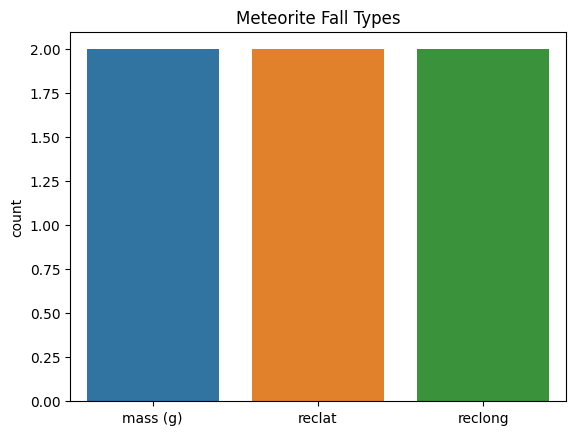

In [ ]:
sns.countplot(data=df)
plt.title("Meteorite Fall Types")
plt.show()


Mass distribution

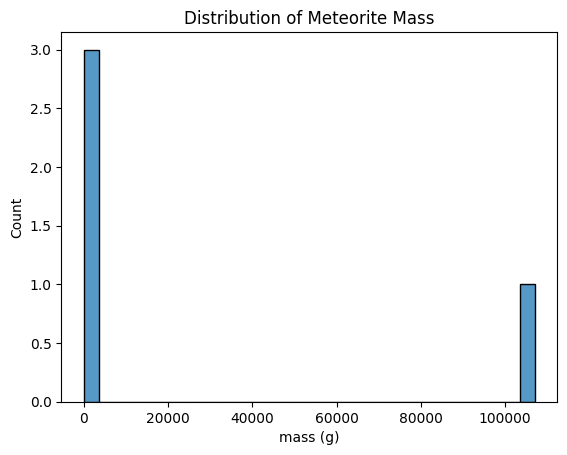